In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [ ]:
 telco=pd.read_csv('Telco_Customer_Churn.csv')

In [ ]:

telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Preprocessing**

### Missing Value

In [ ]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Duplicated


In [ ]:
telco.duplicated().sum()

0

In [ ]:
## customerID di drop karena tidak berpengaruh terhadap churn

telco.drop(columns=["customerID"], inplace=True)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
telco = telco.loc[~telco['TotalCharges'].str.contains(' ')]

telco['TotalCharges']= telco['TotalCharges'].astype(float)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:

telco.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Label Encoding

In [ ]:
le = preprocessing.LabelEncoder()


telco['multiple_n']=le.fit_transform(telco['MultipleLines'])
telco['onlinesecure_n']=le.fit_transform(telco['OnlineSecurity'])
telco['onlinebackup_n']=le.fit_transform(telco['OnlineBackup'])
telco['devicepro_n']=le.fit_transform(telco['DeviceProtection'])
telco['tech_n']=le.fit_transform(telco['TechSupport'])
telco['streamtv_n']=le.fit_transform(telco['StreamingTV'])
telco['streammovies_n']=le.fit_transform(telco['StreamingMovies'])


In [ ]:
telco.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,multiple_n,onlinesecure_n,onlinebackup_n,devicepro_n,tech_n,streamtv_n,streammovies_n
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,No,1,0,2,0,0,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,No,0,2,0,2,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,Yes,0,2,2,0,0,0,0


## Ordinal Encoding

### Internet Service

In [ ]:
map_internet = {'No':3,
                'Fiber optic':2,
                'DSL':1}
telco['internet_n'] = telco['InternetService'].map(map_internet)
telco[['InternetService', 'internet_n']].head()

,InternetService,internet_n
0,DSL,1
1,DSL,1
2,DSL,1
3,DSL,1
4,Fiber optic,2


In [ ]:
telco[['InternetService', 'internet_n']].drop_duplicates()

,InternetService,internet_n
0,DSL,1
4,Fiber optic,2
11,No,3


### Contract

In [ ]:
map_contract = {'Two year':3,
                'One year':2,
                'Month-to-month':1}
telco['contract_n'] = telco['Contract'].map(map_contract)
telco[['Contract', 'contract_n']].head()

,Contract,contract_n
0,Month-to-month,1
1,One year,2
2,Month-to-month,1
3,One year,2
4,Month-to-month,1


In [ ]:
telco[['Contract', 'contract_n']].drop_duplicates()

,Contract,contract_n
0,Month-to-month,1
1,One year,2
11,Two year,3


### Payment Method

In [ ]:
map_payment = {'Bank transfer (automatic)':1,
                'Credit card (automatic)':2,
                'Electronic check':3,
               'Mailed check':4}
telco['payment_n'] = telco['PaymentMethod'].map(map_payment)
telco[['PaymentMethod', 'payment_n']].head()

,PaymentMethod,payment_n
0,Electronic check,3
1,Mailed check,4
2,Mailed check,4
3,Bank transfer (automatic),1
4,Electronic check,3


In [ ]:
telco[['PaymentMethod', 'payment_n']].drop_duplicates()

,PaymentMethod,payment_n
0,Electronic check,3
1,Mailed check,4
3,Bank transfer (automatic),1
6,Credit card (automatic),2


## One - hot encoding

In [ ]:
telco=pd.get_dummies(telco, columns=['gender'])


In [ ]:
telco['gender_Female']= telco['gender_Female'].astype(int)
telco['gender_Male']= telco['gender_Male'].astype(int)


In [ ]:
telco.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,onlinebackup_n,devicepro_n,tech_n,streamtv_n,streammovies_n,internet_n,contract_n,payment_n,gender_Female,gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,2,0,0,0,0,1,1,3,1,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,...,0,2,0,0,0,1,2,4,0,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,...,2,0,0,0,0,1,1,4,0,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,0,2,2,0,0,1,2,1,0,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,...,0,0,0,0,0,2,1,3,1,0


In [ ]:
telco['Churn']=telco['Churn'].replace("No", 0).replace("Yes", 1)
telco['Partner']=telco['Partner'].replace("No", 0).replace("Yes", 1)
telco['Dependents']=telco['Dependents'].replace("No", 0).replace("Yes", 1)
telco['PhoneService']=telco['PhoneService'].replace("No", 0).replace("Yes", 1)
telco['PaperlessBilling']=telco['PaperlessBilling'].replace("No", 0).replace("Yes", 1)

In [ ]:
telco.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,onlinebackup_n,devicepro_n,tech_n,streamtv_n,streammovies_n,internet_n,contract_n,payment_n,gender_Female,gender_Male
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,...,2,0,0,0,0,1,1,3,1,0
1,0,0,0,34,1,No,DSL,Yes,No,Yes,...,0,2,0,0,0,1,2,4,0,1
2,0,0,0,2,1,No,DSL,Yes,Yes,No,...,2,0,0,0,0,1,1,4,0,1
3,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,...,0,2,2,0,0,1,2,1,0,1
4,0,0,0,2,1,No,Fiber optic,No,No,No,...,0,0,0,0,0,2,1,3,1,0


## Frequency Encoding

In [ ]:
freq_et = telco['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et['pct_Contract'] = round((freq_et['freq_Contract']/freq_et['freq_Contract'].sum())*100,2)
freq_et

,Contract,freq_Contract,pct_Contract
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


In [ ]:
telco = telco.merge(freq_et[['Contract','pct_Contract']], on='Contract', how='inner')
telco[['Contract','pct_Contract']]

,Contract,pct_Contract
0,Month-to-month,55.11
1,Month-to-month,55.11
2,Month-to-month,55.11
3,Month-to-month,55.11
4,Month-to-month,55.11
...,...,...
7027,Two year,23.96
7028,Two year,23.96
7029,Two year,23.96
7030,Two year,23.96


## Mean Encoding

In [ ]:
freq_et = telco['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et

,Contract,freq_Contract
0,Month-to-month,3875
1,Two year,1685
2,One year,1472


### jumlahkan value target(churn) berdasarkan category

In [ ]:
sum_et = telco.groupby(['Contract']).agg({'Churn':sum}).reset_index()
sum_et.rename(columns={"Churn": "sum_Contract"}, inplace = True)
sum_et

,Contract,sum_Contract
0,Month-to-month,1655
1,One year,166
2,Two year,48


### Hitung mean encoding untuk variabel contract

In [ ]:
mean_ec = freq_et.merge(sum_et, on='Contract', how='inner')
mean_ec['mean_ec_Contract'] = round((mean_ec['sum_Contract']/mean_ec['freq_Contract']),2)
mean_ec

,Contract,freq_Contract,sum_Contract,mean_ec_Contract
0,Month-to-month,3875,1655,0.43
1,Two year,1685,48,0.03
2,One year,1472,166,0.11


In [ ]:
telco = telco.merge(mean_ec[['Contract','mean_ec_Contract']], on='Contract', how='inner')
telco[['Contract','mean_ec_Contract']]

,Contract,mean_ec_Contract
0,Month-to-month,0.43
1,Month-to-month,0.43
2,Month-to-month,0.43
3,Month-to-month,0.43
4,Month-to-month,0.43
...,...,...
7027,Two year,0.03
7028,Two year,0.03
7029,Two year,0.03
7030,Two year,0.03


### membuat nama df baru dengan data numerik semua

In [ ]:
telco_new=telco.drop(columns=['MultipleLines',
                    'InternetService',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies',
                    'Contract',
                    'PaymentMethod'])

In [ ]:
telco_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   PaperlessBilling  7032 non-null   int64  
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   int64  
 9   multiple_n        7032 non-null   int64  
 10  onlinesecure_n    7032 non-null   int64  
 11  onlinebackup_n    7032 non-null   int64  
 12  devicepro_n       7032 non-null   int64  
 13  tech_n            7032 non-null   int64  
 14  streamtv_n        7032 non-null   int64  
 15  streammovies_n    7032 non-null   int64  
 16  internet_n        7032 non-null   int64  


In [ ]:

telco_new.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
multiple_n          0
onlinesecure_n      0
onlinebackup_n      0
devicepro_n         0
tech_n              0
streamtv_n          0
streammovies_n      0
internet_n          0
contract_n          0
payment_n           0
gender_Female       0
gender_Male         0
pct_Contract        0
mean_ec_Contract    0
dtype: int64

### There are no missing values

In [ ]:
telco_new.duplicated().sum()


22

In [ ]:
telco_nodup = telco_new.drop_duplicates()

In [ ]:
telco_nodup.duplicated().sum()

0

### There are 22 duplicated Values

## Feature + Target

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = telco_nodup.drop(columns='Churn')
y = telco_nodup[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

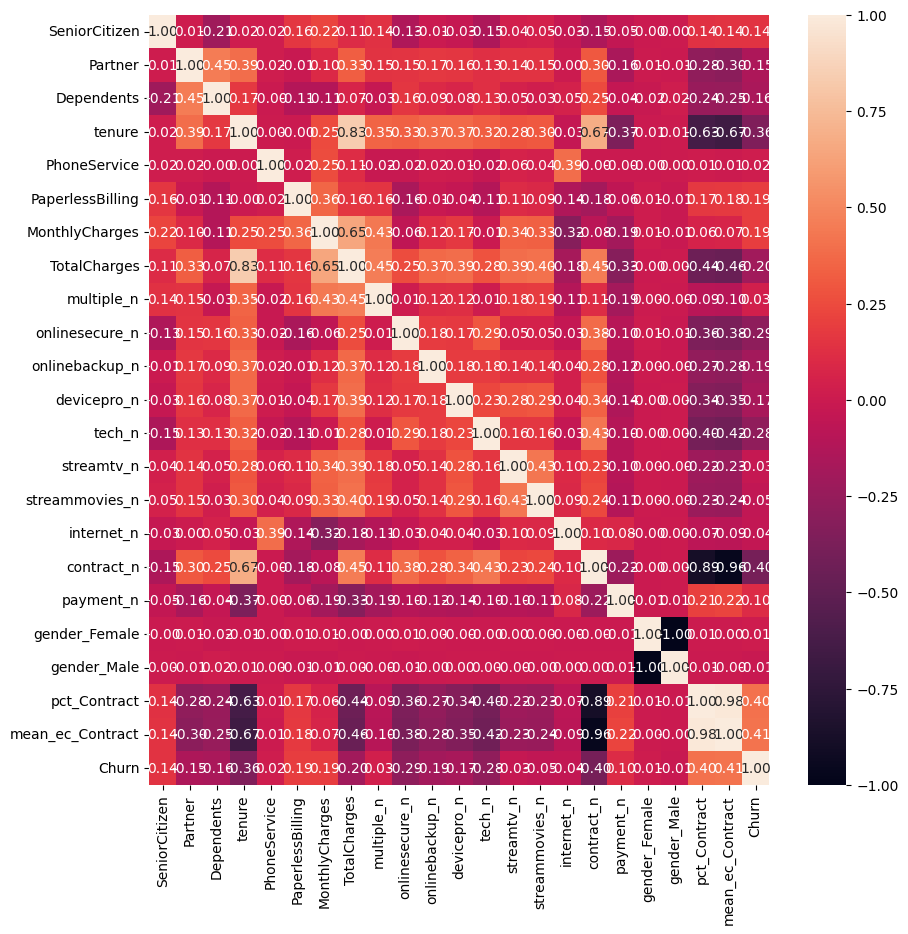

In [ ]:
# heatmap corr

admit_train = pd.concat([X_train, y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


In [ ]:
telco_nodup['Churn'].value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

# **Modeling**

## **1. Decision Tree**

In [ ]:
X = telco_nodup.drop('Churn', axis=1)
y = telco_nodup['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

# **Metric Evaluation**

In [ ]:
print('Akurasi Decission Tree',accuracy_score(y_test, y_pred_dt))

Akurasi Decission Tree 0.703281027104137


In [ ]:
print(classification_report(y_test, y_pred_dt, digits=6))

              precision    recall  f1-score   support

           0   0.798680  0.791367  0.795007      1529
           1   0.457483  0.468641  0.462995       574

    accuracy                       0.703281      2103
   macro avg   0.628081  0.630004  0.629001      2103
weighted avg   0.705552  0.703281  0.704386      2103



### Interpretation :


*   The accuracy of Decision Tree Models predict 70,32%
*   Unfornately the datasets was imbalance, then we cant use accuracy for predict
*   We can still use another metric evaluation, such as F1 score to understanding the model performance





## **2. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 0, 1, ..., 0, 0, 0])

# **Metric Evaluation**

In [ ]:
print('Logistic Regression',accuracy_score(y_test, y_pred_reg))

Logistic Regression 0.8026628625772706


In [ ]:
print(classification_report(y_test, y_pred_reg, digits=6))

              precision    recall  f1-score   support

           0   0.837576  0.903859  0.869456      1529
           1   0.675497  0.533101  0.595910       574

    accuracy                       0.802663      2103
   macro avg   0.756536  0.718480  0.732683      2103
weighted avg   0.793337  0.802663  0.794793      2103



### Interpretation :


*   The accuracy of Logistic Regression Models predict 80,26%
*   Unfornately the datasets was imbalance, then we cant use accuracy for predicting

*   We can still use another metric evaluation, such as F1 score to understanding the model performance

## **3. Oversampling SMOTE**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# X_val = data original

In [ ]:
from imblearn import over_sampling

# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)


In [ ]:
X_train_, X_test, y_train_, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, f1_score

In [ ]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

# data sudah dimanipulasi
y_pred = model.predict(X_test)

# data original
y_pred_val = model.predict(X_val)

## **Metric Evaluation**

In [ ]:
print(classification_report(y_val, y_pred_val, digits=6))

              precision    recall  f1-score   support

           0   0.819716  0.909360  0.862214      1015
           1   0.666667  0.475452  0.555053       387

    accuracy                       0.789586      1402
   macro avg   0.743191  0.692406  0.708633      1402
weighted avg   0.777469  0.789586  0.777427      1402



In [ ]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.789323  0.997590  0.881320       830
           1   0.996705  0.732446  0.844382       826

    accuracy                       0.865338      1656
   macro avg   0.893014  0.865018  0.862851      1656
weighted avg   0.892764  0.865338  0.862896      1656



### Interpretation :


*   Precision for category '1' is 99% , it means predict of '1' are 99% correct
*   recall or sensitivity for category '1' is 73%. it means model 73% correctly identified of category '1'

*   f1 score for category '1' is 84,43%. f1 score is a metric that combines of precision and recall it gives an overall picture of the model's performance. besides that, it can be use both in imbalance or balance datasets

*   f1 score for category '1' is 84,43% it indicates that the model have a good accuracy in predicting
*   the accuracy is 86,53% it means model correctly predicting 86,53% of all test datasets

### The conclusion is model with oversampling SMOTE performs well with 86,53% accuracy predicting





## **4. Random Forest**

## Imbalance Data Handling

In [ ]:
telco_nodup.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,multiple_n,...,tech_n,streamtv_n,streammovies_n,internet_n,contract_n,payment_n,gender_Female,gender_Male,pct_Contract,mean_ec_Contract
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,1,1,3,1,0,55.11,0.43
1,0,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,1,1,4,0,1,55.11,0.43
2,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,2,1,3,1,0,55.11,0.43
3,0,0,0,8,1,1,99.65,820.50,1,2,...,0,2,2,2,1,3,1,0,55.11,0.43
4,0,0,1,22,1,1,89.10,1949.40,0,2,...,0,2,0,2,1,2,0,1,55.11,0.43


In [ ]:
target = telco['Churn'].value_counts().reset_index()
target.rename(columns={'index':'Churn','Churn':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Churn,freq,percentage
0,0,5163,73.42
1,1,1869,26.58


In [ ]:
telco_numeric = telco[['Churn','SeniorCitizen','tenure','contract_n','MonthlyCharges','TotalCharges']]
telco_numeric = telco_numeric.dropna()
telco_numeric.head()

,Churn,SeniorCitizen,tenure,contract_n,MonthlyCharges,TotalCharges
0,0,0,1,1,29.85,29.85
1,1,0,2,1,53.85,108.15
2,1,0,2,1,70.70,151.65
3,1,0,8,1,99.65,820.50
4,0,0,22,1,89.10,1949.40


In [ ]:

from imblearn import under_sampling, over_sampling
from imblearn import over_sampling
X = telco_numeric.drop(['Churn'], axis=1)
y = telco_numeric['Churn']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X,y)

# Oversampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X,y)

# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)




In [ ]:
telco_under = pd.concat([X_under, y_under], axis=1)
telco_under.head(3)

,SeniorCitizen,tenure,contract_n,MonthlyCharges,TotalCharges,Churn
0,1,71,2,92.0,6585.2,0
1,0,52,3,106.3,5487.0,0
2,0,57,1,49.9,2782.4,0


In [ ]:
telco_over = pd.concat ([X_over, y_over], axis=1)
telco_over.head(3)

,SeniorCitizen,tenure,contract_n,MonthlyCharges,TotalCharges,Churn
0,0,1,1,29.85,29.85,0
1,0,2,1,53.85,108.15,1
2,0,2,1,70.70,151.65,1


In [ ]:
telco_over_smote = pd.concat ([X_over_smote, y_over_smote], axis=1)
telco_over_smote.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,multiple_n,onlinesecure_n,...,streamtv_n,streammovies_n,internet_n,contract_n,payment_n,gender_Female,gender_Male,pct_Contract,mean_ec_Contract,Churn
0,0,1,1,4,0,0,38.55,156.10,1,2,...,2,0,1,1,2,0,1,55.11,0.43,0
1,0,1,1,48,1,0,26.30,1245.05,2,1,...,1,1,3,3,1,0,1,23.96,0.03,0
2,0,0,0,18,1,1,74.15,1345.75,2,0,...,0,0,2,1,3,1,0,55.11,0.43,0


In [ ]:
telco_under['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [ ]:
telco_over['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
telco_over_smote['Churn'].value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

## Random Forest with Imbalance Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
telco_nodup.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,multiple_n,...,tech_n,streamtv_n,streammovies_n,internet_n,contract_n,payment_n,gender_Female,gender_Male,pct_Contract,mean_ec_Contract
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,1,1,3,1,0,55.11,0.43
1,0,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,1,1,4,0,1,55.11,0.43
2,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,2,1,3,1,0,55.11,0.43
3,0,0,0,8,1,1,99.65,820.50,1,2,...,0,2,2,2,1,3,1,0,55.11,0.43
4,0,0,1,22,1,1,89.10,1949.40,0,2,...,0,2,0,2,1,2,0,1,55.11,0.43


In [ ]:
X = telco_nodup.drop(['Churn'], axis=1)
y = telco_nodup['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 75% train
# 25% test

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
preds = model.predict(X_test)
preds

array([0, 0, 1, ..., 0, 0, 0])

## **Metric Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
cm = confusion_matrix(y_test, preds)
cm

array([[1145,  128],
       [ 248,  232]])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
from sklearn.metrics import roc_auc_score
print('AUC', roc_auc_score(y_test, preds))

AUC 0.6913917255826133


In [ ]:
from sklearn.metrics import f1_score
print('F1 score', f1_score(y_test, preds))

F1 score 0.5523809523809524


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits=6))

              precision    recall  f1-score   support

           0   0.821967  0.899450  0.858965      1273
           1   0.644444  0.483333  0.552381       480

    accuracy                       0.785511      1753
   macro avg   0.733206  0.691392  0.705673      1753
weighted avg   0.773358  0.785511  0.775017      1753



### Interpretation :


*  The datasets are imbalance data
* Precision for category '1' is 64% , it means predict of '1' are 64% correct
*   recall or sensitivity for category '1' is 48,33%. it means model 48,33% correctly identified of category '1'
*   the accuracy is 78,55% it means model correctly predicting 78,55% of all test datasets
*  f1 score for category '1' is 55,2% it indicates that the model have a moderate level in predicting
* An AUC value is 69,14% it indicates that the model's ability to distinguish between positive and negative classes is fairly good. if AUC > 0.5, the higher of value, the better of the model performance

* because datasets are imbalance, then we can't use accuracy for predicting. we still another metric evaluation such as F1 score, AUC for predicting

### The conclusion is because of the model has imbalance data, then use another metric evaluation for predicting, such as F1 score, AUC.

##  **EVALUATION CONCLUSION**

 *   the datasets has imbalance data
 *   because datasets are imbalance, then we can't use accuracy for predicting. we still another metric evaluation such as F1 score, AUC for predicting
 * from of all the modeling that has been tested. We can see that Random Forest is the best model
 * though the f1 score is higher in logistic regression model than random forest, random forest are better at handling nonlinear relationships and interactions between features. It can catch more complex patterns in data.




